In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/sentiment_tweets3 (1).csv')
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [3]:
df.shape

(10314, 3)

In [4]:
df.dtypes

,0
Index,int64
message to examine,object
label (depression result),int64


In [5]:
df['label (depression result)'].value_counts()

,count
label (depression result),
0,8000
1,2314


In [6]:
df.isna().sum()

,0
Index,0
message to examine,0
label (depression result),0


In [7]:
text=df['message to examine']
text

,message to examine
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...
10309,No Depression by G Herbo is my mood from now o...
10310,What do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...
10312,dont mistake a bad day with depression! everyo...


In [8]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()


In [9]:
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda y:''  ''.join(y))
text

,message to examine
0,"justhadarealgoodmoment.imisssssssssshimsomuch,"
1,isreadmangahttp://plurk.com/p/mzp1
2,@comeagainjenhttp://twitpic.com/2y2lx-http://w...
3,"@lapcatneedtosend'emtomyaccounttomorrow.odd,iw..."
4,addmeonmyspac!!!myspace.com/lookthund
...,...
10309,"nodepressbygherboismymoodfromnowon,i'mdonestre..."
10310,whatdoyoudowhendepresssuccumbthebrainandmakeyo...
10311,"ketaminnasalsprayshowpromisagainstdepress,suic..."
10312,dontmistakabaddaywithdepress!everyonhas'em!


In [10]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
text=text.apply(lambda x:[i  for i in tk.tokenize(x) if i not in sw]).apply(lambda x:''  ''.join(x))



In [12]:
text.shape

(10314,)

In [13]:
text

,message to examine
0,"justhadarealgoodmoment.imisssssssssshimsomuch,"
1,isreadmangahttp://plurk.com/p/mzp1
2,@comeagainjenhttp://twitpic.com/2y2lx-http://w...
3,"@lapcatneedtosend'emtomyaccounttomorrow.odd,iw..."
4,addmeonmyspac!!!myspace.com/lookthund
...,...
10309,"nodepressbygherboismymoodfromnowon,i'mdonestre..."
10310,whatdoyoudowhendepresssuccumbthebrainandmakeyo...
10311,"ketaminnasalsprayshowpromisagainstdepress,suic..."
10312,dontmistakabaddaywithdepress!everyonhas'em!


In [14]:
from sklearn .feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
train_vec=tf.fit_transform(text)
print(train_vec)

  (0, 14164)	0.7071067811865476
  (0, 11834)	0.7071067811865476
  (1, 12482)	0.6158588881656176
  (1, 20506)	0.43702705471090875
  (1, 5185)	0.22459522075397542
  (1, 18427)	0.6158588881656176
  (2, 5185)	0.3076712598346072
  (2, 5190)	0.4218301693289752
  (2, 26915)	0.24131585542881942
  (2, 522)	0.4218301693289752
  (2, 10553)	0.1921658117485615
  (2, 29037)	0.214774271991016
  (2, 29635)	0.3426720424773217
  (2, 27802)	0.33586182086130767
  (2, 29767)	0.4218301693289752
  (3, 14802)	0.39437757057687955
  (3, 7138)	0.39437757057687955
  (3, 19305)	0.39437757057687955
  (3, 13340)	0.3490006705687449
  (3, 24373)	0.39437757057687955
  (3, 25778)	0.39437757057687955
  (3, 25784)	0.3170649634884915
  (4, 5185)	0.21460288354152604
  (4, 1377)	0.5884590634268
  (4, 18391)	0.5112508813854205
  :	:
  (10307, 25408)	0.31622776601683794
  (10307, 17233)	0.31622776601683794
  (10307, 25150)	0.31622776601683794
  (10307, 21270)	0.31622776601683794
  (10307, 22370)	0.31622776601683794
  (10307, 2

In [15]:
# Tfidvecterizer for text format covert into numerical format.

In [16]:
train_vec.shape

(10314, 29907)

In [17]:
x= train_vec
y=df['label (depression result)'].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [19]:
# model bulding

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8613893376413571

In [21]:
# model bulding

In [22]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svmodel=SVC()
nbmodel=MultinomialNB()
rfmodel=RandomForestClassifier()
abmodel=AdaBoostClassifier()
lst_model=[svmodel,nbmodel,rfmodel,abmodel]

In [23]:
print(y_train.shape)
print(y_test.shape)

(7219,)
(3095,)


In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


SVC()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2397
           1       1.00      0.42      0.59       698

    accuracy                           0.87      3095
   macro avg       0.93      0.71      0.75      3095
weighted avg       0.89      0.87      0.85      3095

****************************************************************************************************
MultinomialNB()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2397
           1       1.00      0.38      0.55       698

    accuracy                           0.86      3095
   macro avg       0.92      0.69      0.73      3095
weighted avg       0.88      0.86      0.83      3095

*********************

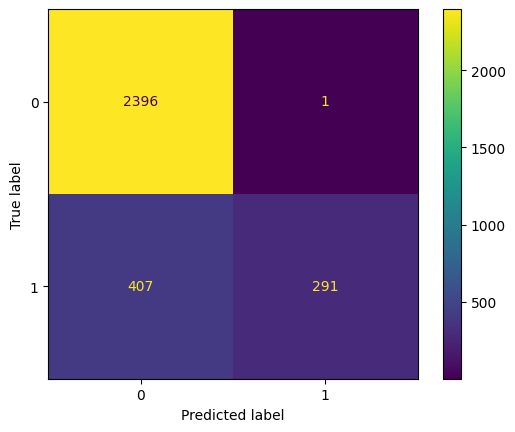

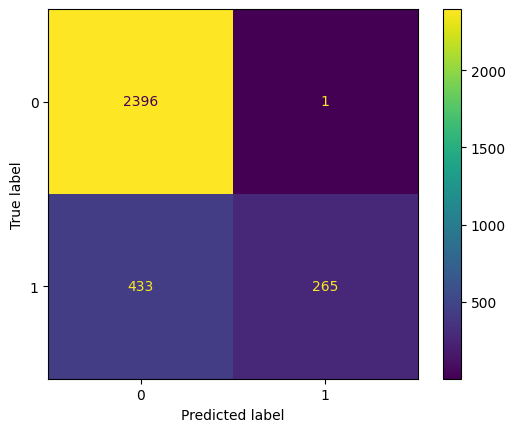

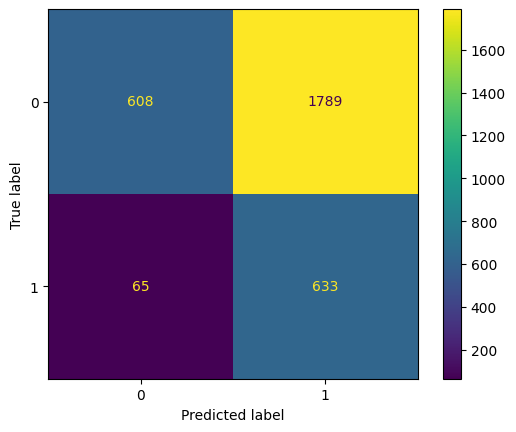

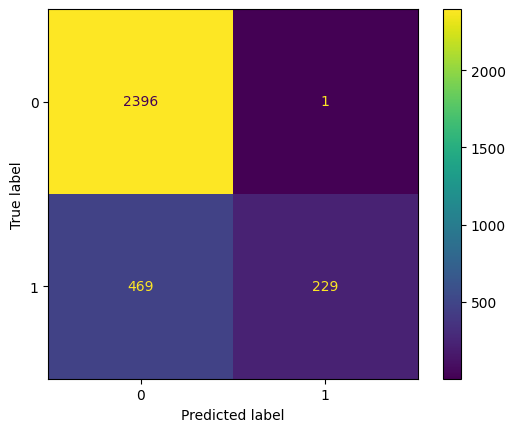

In [26]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_predict = i.predict(x_test)
  print('*'*100)
  print(classification_report(y_test,y_predict))
  print('*'*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))
